In [1]:
# set up the plots
import sys
sys.path.append("..")

from doc import plot_utils
from doc.sample_problem import DocProblem
plot_utils.setup()

# Inverse Problem / Inversion

In [2]:
import numpy as np
import pylab as plt

exampleProblem = DocProblem(norm_test_params_1 = [-11, 6.5], smearing=(5, 2))
exampleProblem.set_bins_x_ini(8, -35, 30)
exampleProblem.set_bins_b_ini(8, -35, 30)
exampleProblem.setup_example()

x_ini_gen = exampleProblem.get_initial_MC()
x_ini = np.histogram(x_ini_gen, exampleProblem.bins_x)
x_test_gen = exampleProblem.get_test_distribution()
x_test = np.histogram(x_test_gen, exampleProblem.bins_x)

scale_factor = len(x_test_gen)/len(x_ini_gen)

b_ini_gen = exampleProblem.get_initial_MC_data()
b_ini = np.histogram(b_ini_gen, exampleProblem.bins_b)
b_test_gen = exampleProblem.get_test_data()
b_test = np.histogram(b_test_gen, exampleProblem.bins_b)

In [3]:
A = exampleProblem.get_response_matrix()[0].T
xini_hist = x_ini[0]

A_prob = np.true_divide(A, xini_hist, where=xini_hist!=0)
# Unfold with response matrix inversion
Ainv = np.linalg.inv(A_prob)
# Solve
unfolded = Ainv.dot(xini_hist)
# get new cov matrix
cov_result = Ainv * np.diagflat(xini_hist) * Ainv.T
error_result = np.sqrt(cov_result.diagonal())
print(error_result)

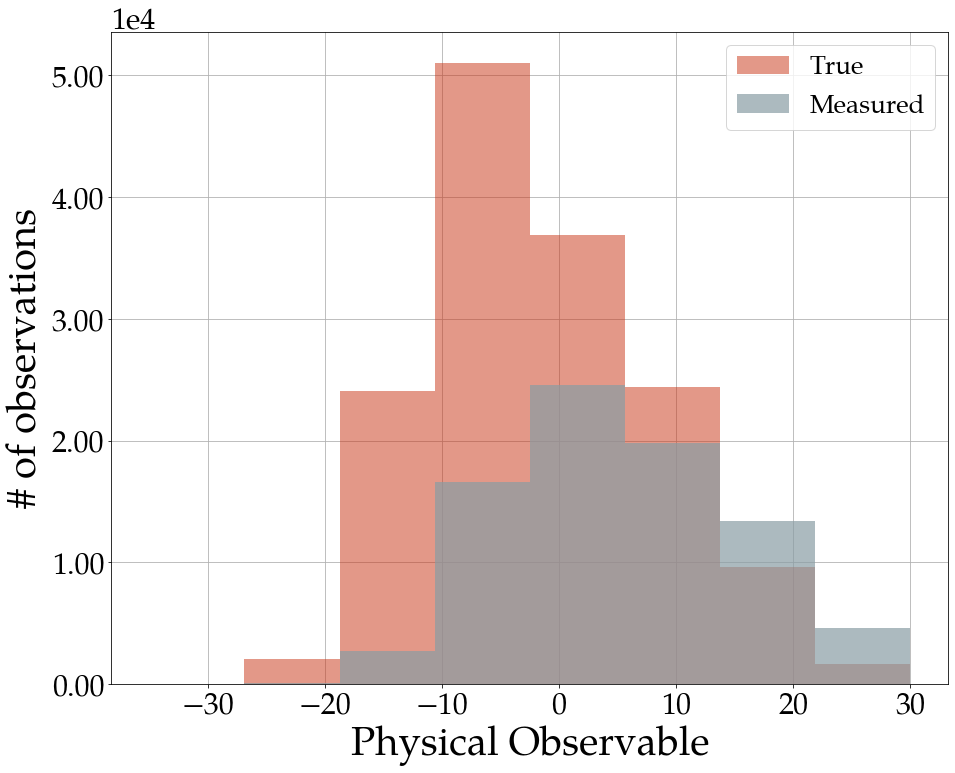

In [4]:
fig = plt.figure(figsize=(3*5, 3*4))
plot_utils.setup_font_1x2()

# plot histograms on the left
ax = fig.add_subplot(1,1,1)
ax.hist(x_ini_gen, density=False, bins=exampleProblem.bins_x, histtype="bar", label="True", alpha=0.5, weights=scale_factor*np.ones(len(x_ini_gen)))
ax.hist(b_ini_gen, density=False, bins=exampleProblem.bins_x, histtype="bar", 
         label="Measured", alpha=0.7, weights=scale_factor*np.ones(len(b_ini_gen)))
ax.set_xlabel("Physical Observable")
ax.set_ylabel("# of observations")
ax.yaxis.set_major_formatter(plot_utils.get_sci_decimal_format())
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.legend()
fig.savefig("./doc/images/unfolding_inversion_histograms.svg")

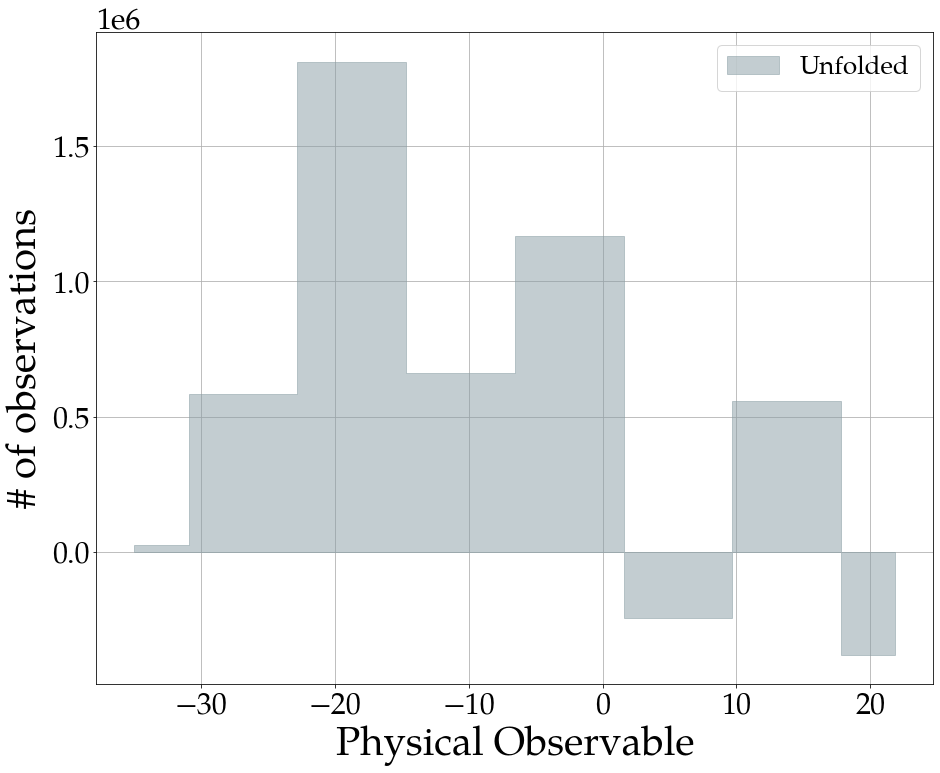

In [5]:
import matplotlib
# plot unfolded on the right
fig = plt.figure(figsize=(3*5, 3*4))
plot_utils.setup_font_1x2()

ax = fig.add_subplot(1,1,1)
bincentres = exampleProblem.bins_x[:-1]
ax.errorbar(bincentres, unfolded, yerr=np.sqrt(error_result), fmt='none')
ax.fill_between(bincentres, unfolded, color=plot_utils.colors["grey"], step="mid", alpha=0.5, label="Unfolded")
ax.set_xlabel("Physical Observable")
ax.set_ylabel("# of observations")
ax.legend()
fig.savefig("./doc/images/unfolding_inversion_result.svg")

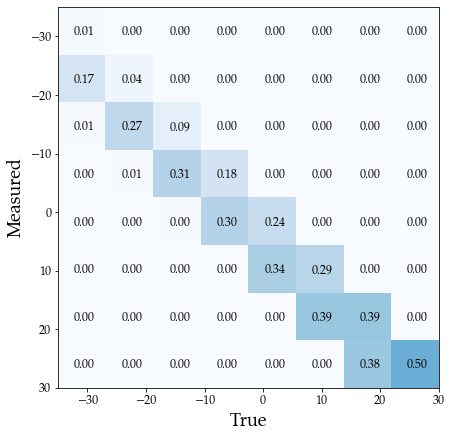

In [17]:
R = A_prob
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

im = ax.imshow((R), cmap="Blues", vmin=0, vmax=1,\
           extent=[exampleProblem.bins_x[0], exampleProblem.bins_x[-1],exampleProblem.bins_b[-1],exampleProblem.bins_b[0]])
ax.set_xlabel("True")
ax.set_ylabel("Measured")
ax.grid(False)
#fig.colorbar(im, ax=ax)

for i in range(len(R)):
    for j in range(len(R[i])):
        color = "black"
        text = ax.text(exampleProblem.bins_x[j]+8.125/3, exampleProblem.bins_b[i]+4.8,
            "%1.2f"%R[i, j], color=color, fontsize="large")
fig.savefig("./doc/images/unfolding_inversion_matrix.svg")

In [19]:
print(error_result)

[1333.33333333 4260.34659202 6359.26603577 4598.41007199 2915.02440652
 1957.89960728  911.9528211   296.37282915]
